# Лабораторная работа №1. Создание истории данных
#### Задание:
* Выбрать набор данных (датасет).

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
* История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
* На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
* Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
* Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
* История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [9]:
data = pd.read_csv('../ds_salaries.csv', sep=",")
print(data.shape)
data.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

(array([109., 154., 294., 360., 502., 541., 611., 352., 365., 163., 119.,
         85.,  37.,  35.,   7.,   7.,   6.,   2.,   4.,   2.]),
 array([  5132. ,  27375.4,  49618.8,  71862.2,  94105.6, 116349. ,
        138592.4, 160835.8, 183079.2, 205322.6, 227566. , 249809.4,
        272052.8, 294296.2, 316539.6, 338783. , 361026.4, 383269.8,
        405513.2, 427756.6, 450000. ]),
 <BarContainer object of 20 artists>)

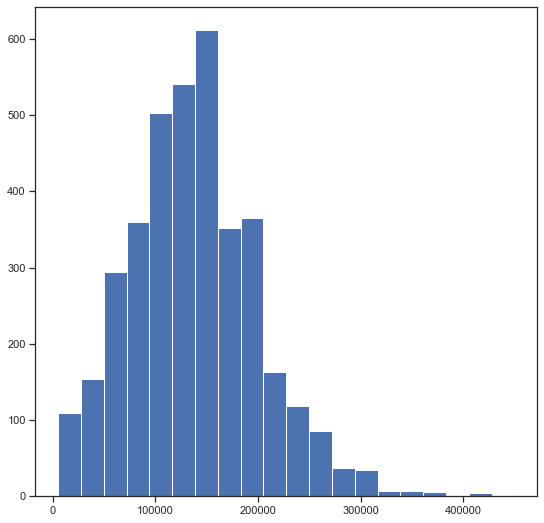

In [119]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(data['salary_in_usd'], bins=20)

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

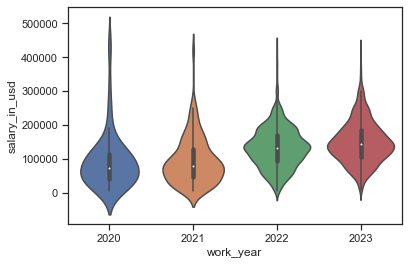

In [127]:
sns.violinplot(x=data["work_year"], y=data["salary_in_usd"])

In [81]:
data['employee_residence'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

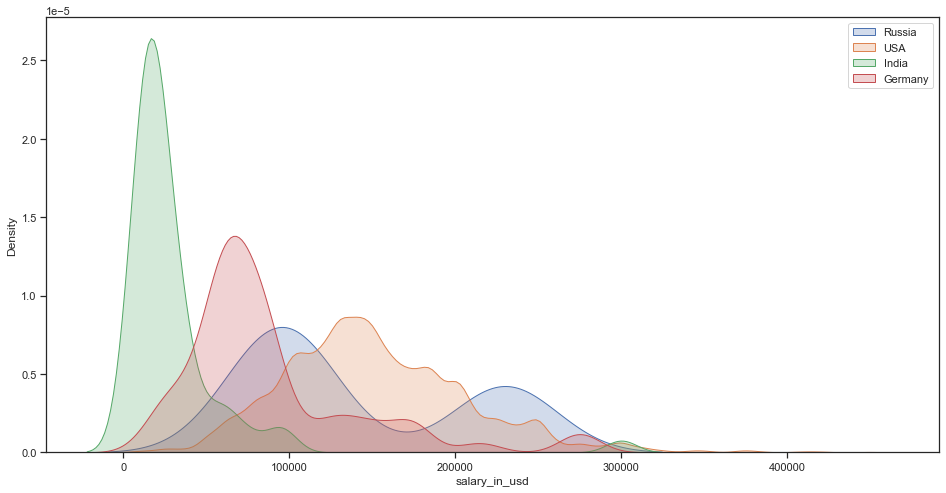

In [150]:
data_ru = data[data['company_location'].isin(['RU'])]
data_us = data[data['company_location'].isin(['US'])]
data_in = data[data['company_location'].isin(['IN'])]
data_de = data[data['company_location'].isin(['DE'])]


plt.subplots(figsize = (16, 8))
fig = sns.kdeplot(data_ru['salary_in_usd'], label='Russia', fill=True, bw_adjust=0.5)
fig = sns.kdeplot(data_us['salary_in_usd'], label='USA', fill=True, bw_adjust=0.5)
fig = sns.kdeplot(data_in['salary_in_usd'], label='India', fill=True, bw_adjust=0.5)
fig = sns.kdeplot(data_de['salary_in_usd'], label='Germany', fill=True, bw_adjust=0.5)
plt.legend()

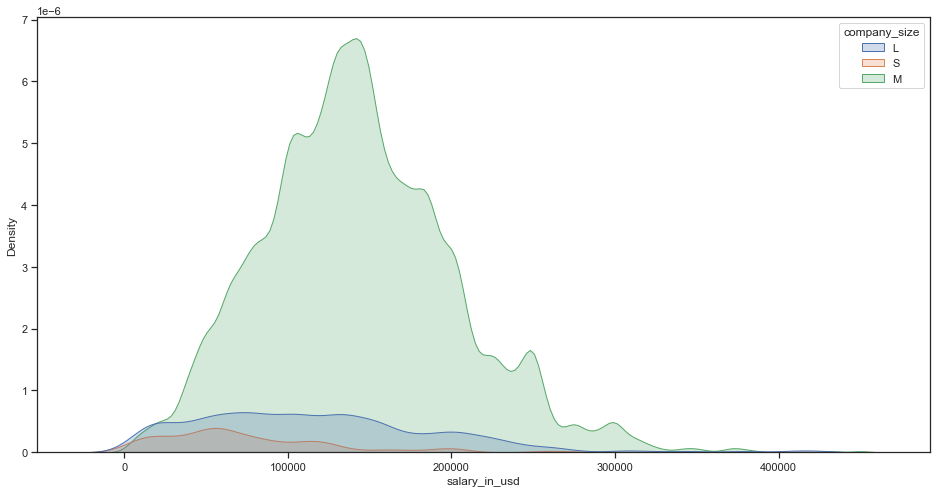

In [151]:
plt.subplots(figsize = (16, 8))
fig = sns.kdeplot(x="salary_in_usd", data=data, label='Russia', hue='company_size', fill=True, bw_adjust=0.5)

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

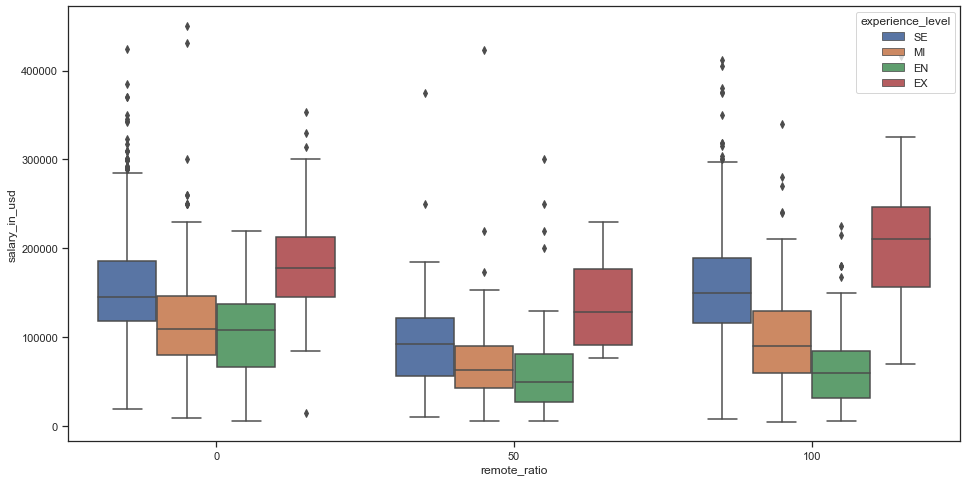

In [140]:
plt.subplots(figsize = (16, 8))
sns.boxplot(x="remote_ratio", y="salary_in_usd",
            hue="experience_level",
            data=data)